In [2]:
import numpy as np
import sys
import warnings

sys.path.append("/workspaces/ood/")
%load_ext autoreload
%autoreload 2
warnings.filterwarnings("ignore")


from ood.ood_detection import isolation_forest_scores
from ood.draw import draw_score_distr_plot
from ood.ood_metrics import get_measures
from ood.utils import prettify_value

In [3]:
N_ESTIMATORS = 500
MAX_SAMPLES = 1000
MAX_FEATURES = 10
VERBOSE = 0

### 1) Softmax trained emb

In [3]:
model_name = "soft"
forest_scores_distr = isolation_forest_scores(
    in_distr_train_path=f"../data/predictions/{model_name}_cifar_train.npy",
    in_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    in_distr_ds_name="cifar",
    out_distr_ds_name="svhn",
    n_estimators=N_ESTIMATORS,
    max_samples=MAX_SAMPLES,
    max_features=MAX_FEATURES,
    verbose=VERBOSE,
    seed=42,
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s finished


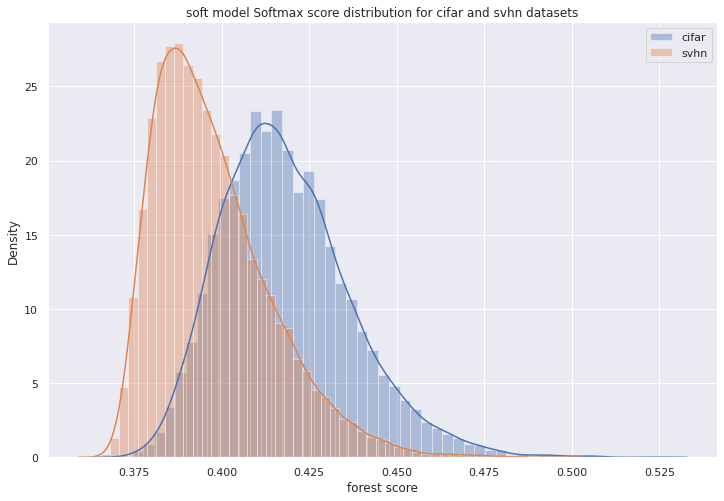

In [4]:
draw_score_distr_plot(
    scores_distr=forest_scores_distr,
    score_type="forest",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)

In [5]:
auroc, aupr, fpr = get_measures(
    forest_scores_distr["cifar"], forest_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 soft softmax scores: 
 auroc 0.80906
 aupr  0.58054
 FPR95 0.57260


### 2) MoCo trained emb

In [6]:
model_name = "moco"
forest_scores_distr = isolation_forest_scores(
    in_distr_train_path=f"../data/predictions/{model_name}_cifar_train.npy",
    in_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    in_distr_ds_name="cifar",
    out_distr_ds_name="svhn",
    n_estimators=N_ESTIMATORS,
    max_samples=MAX_SAMPLES,
    max_features=MAX_FEATURES,
    verbose=VERBOSE,
    seed=42,
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s finished


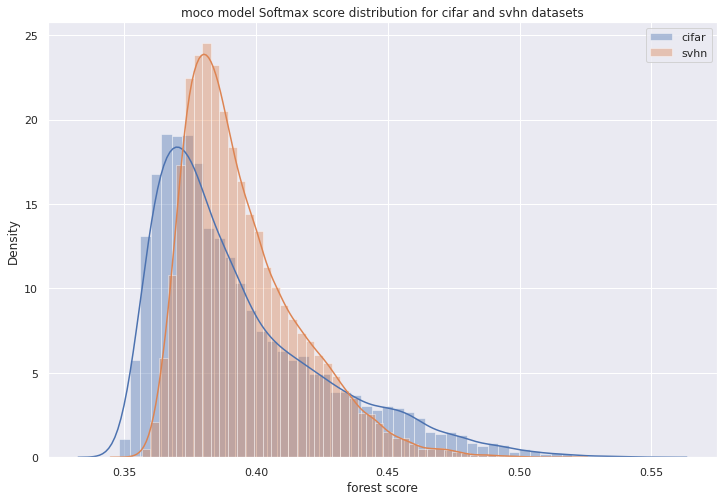

In [7]:
draw_score_distr_plot(
    scores_distr=forest_scores_distr,
    score_type="forest",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)

In [8]:
auroc, aupr, fpr = get_measures(
    forest_scores_distr["cifar"], forest_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 moco softmax scores: 
 auroc 0.43103
 aupr  0.31228
 FPR95 0.99946


### 3) BYOL trained emb

In [9]:
model_name = "byol"
forest_scores_distr = isolation_forest_scores(
    in_distr_train_path=f"../data/predictions/{model_name}_cifar_train.npy",
    in_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    in_distr_ds_name="cifar",
    out_distr_ds_name="svhn",
    n_estimators=N_ESTIMATORS,
    max_samples=MAX_SAMPLES,
    max_features=MAX_FEATURES,
    verbose=VERBOSE,
    seed=42,
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s finished


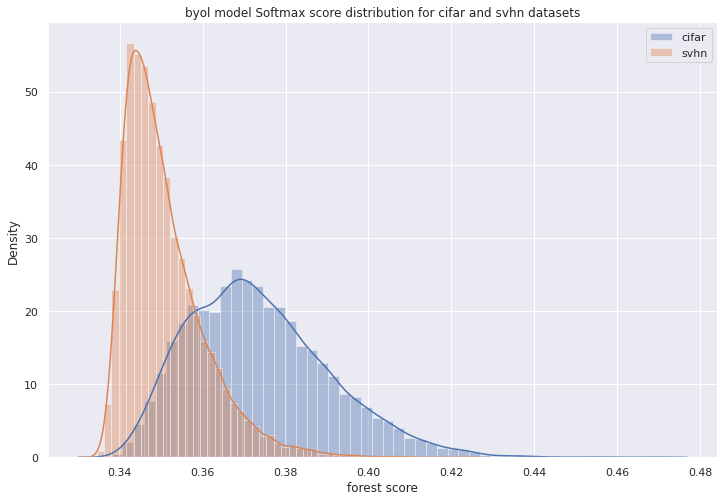

In [10]:
draw_score_distr_plot(
    scores_distr=forest_scores_distr,
    score_type="forest",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)

In [11]:
auroc, aupr, fpr = get_measures(
    forest_scores_distr["cifar"], forest_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 byol softmax scores: 
 auroc 0.89370
 aupr  0.78342
 FPR95 0.44591
